In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('data/csv_result-ebay_confianca_completo.csv')

In [ ]:
dataset.shape

In [14]:
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,False,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,False,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,False,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


<Axes: xlabel='count', ylabel='reputation'>

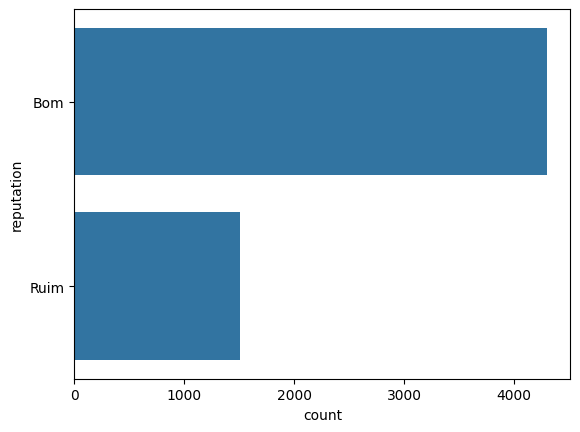

In [15]:
import seaborn as sns
sns.countplot(dataset['reputation'])

In [19]:
X = dataset.iloc[:, 0:74].values
y = dataset.iloc[:, 74].values

In [17]:
X.shape

(5806, 74)

In [20]:
X,y

(array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
         0.828716381071851],
        [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
         0.8093789692710098],
        [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
         0.82603890125472],
        ...,
        [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
         0.8320726536961992],
        [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
         0.8199238314070743],
        [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
         0.7920921058167003]], dtype=object),
 array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object))

In [21]:
dataset['blacklist'] = dataset['blacklist'] == 'S'

In [22]:
np.unique(y,return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [25]:
X_train.shape,y_train.shape

((4644, 74), (4644,))

In [26]:
X_test.shape,y_test.shape

((1162, 74), (1162,))

In [28]:
from sklearn.ensemble import RandomForestClassifier


In [29]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7444061962134251

In [31]:
from imblearn.under_sampling import TomekLinks


In [33]:
tl = TomekLinks(return_indices=True,ratio='majority')
X_tl, y_tl = tl.fit_resample(X, y)

TypeError: TomekLinks.__init__() got an unexpected keyword argument 'return_indices'